In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('penguins.csv')
print(data.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE


In [25]:
data = data.dropna()
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [26]:
X = data.drop(columns=['sex'])
y = data['sex']


In [27]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)  # Remove features with variance below 0.1
X_new = selector.fit_transform(X)
print(X_new)


[[  39.1   18.7  181.  3750. ]
 [  39.5   17.4  186.  3800. ]
 [  40.3   18.   195.  3250. ]
 ...
 [  50.4   15.7  222.  5750. ]
 [  45.2   14.8  212.  5200. ]
 [  49.9   16.1  213.  5400. ]]


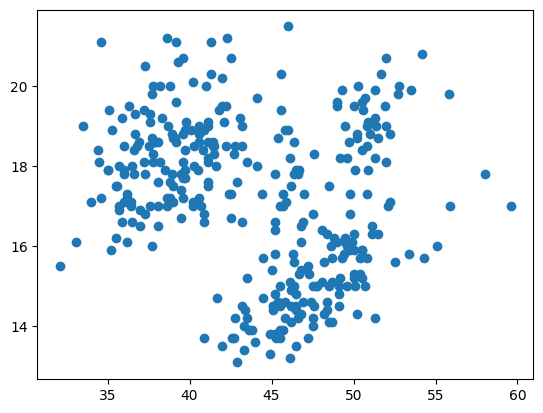

In [28]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)
print(X_scaled)

[[-0.89772327  0.77726336 -0.12689335 -0.57223347]
 [-0.82426521  0.11703673 -0.10787184 -0.50992298]
 [-0.67734909  0.42175671 -0.07363312 -1.19533834]
 ...
 [ 1.17746691 -0.74633656  0.02908304  1.920186  ]
 [ 0.22251214 -1.20341653 -0.00895998  1.23477065]
 [ 1.08564434 -0.5431899  -0.00515568  1.4840126 ]]


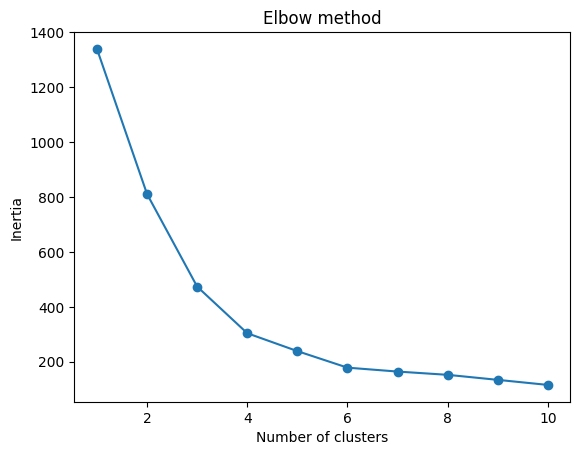

In [30]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

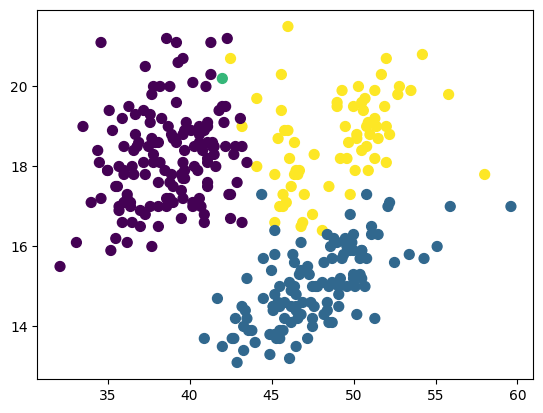

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_kmeans, s=50, cmap='viridis')



In [57]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.4746420543519823


In [58]:
scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(X_new)

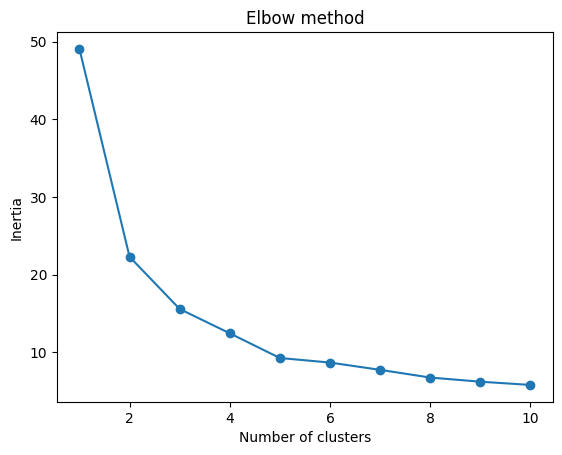

In [63]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

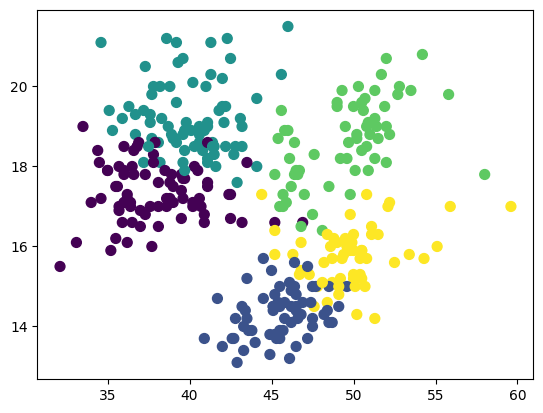

In [65]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled2)
y_kmeans2 = kmeans.predict(X_scaled2)

plt.scatter(X_new[:, 0], X_new[:, 1], c=y_kmeans2, s=50, cmap='viridis')
